# Week 7 (Wed) - Number Representation and Precision - HW 6

## Functions & Recursion

The syntax for a **function** is:
    
    def function_name(arguments):
        # code here
        return values

Try and write a function that will return the factorial of a number (e.g. 5! = 5 * 4 * 3 * 2 * 1).

In [1]:
def factorial(num):
    fact = 1
    for i in range(1,num+1):
        fact *= i
    return fact

# Testing it below.
num = 5
print("The factorial of", num, "is", factorial(num))

The factorial of 5 is 120


Try and write a function that will return the factorial of a number (e.g. 5! = 5 * 4 * 3 * 2 * 1), with recursion

In [2]:
def factorial_recur(num):
    if num != 1:
        return num * factorial_recur(num-1)
    else:
        return 1
# Testing it below.
num = 5
print("The factorial of", num, "is", factorial_recur(num))

The factorial of 5 is 120


In [3]:
def factorial_recur(num):
    if num != 1:
        print ("recursion " + str(num))
        return num * factorial_recur(num-1)
    else:
        print ("recursion start " + str(num))
        return 1
# Testing it below.
num = 5
print("The factorial of", num, "is", factorial_recur(num))

recursion 5
recursion 4
recursion 3
recursion 2
recursion start 1
The factorial of 5 is 120


Real numbers are stored with a decimal precision (or mantissa) and the decimal exponent range. The mantissa contains the significant figures of the number (and thereby the precision of the number). A number like (9.90625)10 in the decimal representation is given in a binary representation by

(1001.11101)$_2$ = $1\times2^3 +0\times2^2 +0\times2^1 +1\times2^0 +1\times2^{−1} +1\times2^{−2} +1\times2^{−3} +0\times2^{−4} +1 \times 2^{−5}$

and it has an exact machine number representation since we need a finite number of bits to represent this number. This representation is however not very practical. Rather, we prefer to use a scientific notation. In the decimal system we would write a number like 9.90625 in what is called the normalized scientific notation. This means simply that the decimal point is shifted and appropriate powers of 10 are supplied. Our number could then be written as
$9.90625 = 0.990625 \times 10^1$,
and a real non-zero number could be generalized as
$x = \pm r \times 10^n$,
with a $r$ a number in the range $1/10 \le r < 1$. In a similar way we can represent a binary number in
scientific notation as
$x = \pm q \times 2^m$,
with a $q$ a number in the range $1/2 \le q < 1$.

In a typical computer, floating-point numbers are represented in the way described above, but with certain restrictions on q and m imposed by the available word length. In the machine, our number x is represented as

$x = (−1)^s \times mantissa \times 2^{exponent}$

where $s$ is the sign bit, and the exponent gives the available range. With a single-precision word, 32 bits, 8 bits would typically be reserved for the exponent, 1 bit for the sign and 23 for the mantissa. 

## 32-bit – single precision (old computers):

Sign bit: 1 bit

Exponent: 8 bits

Significand precision: 24 bits (23 explicitly stored)

This gives 6–9 significant decimal digits precision!

## 64-bit = double precision (normal modern computers):

Sign bit: 1 bit

Exponent: 11 bits

Significand precision: 53 bits (52 explicitly stored)

This gives 15–17 significant decimal digits precision.
This the the Python default standard


## 128-bit = quadruple precision:

Sign bit: 1 bit

Exponent: 15 bits

Significand precision: 113 bits (112 explicitly stored)

This gives 33–36 significant decimal digits precision.


## 256-bit – Octuple precision:

Sign bit: 1 bit
    
Exponent: 19 bits
    
Significand precision: 237 bits (236 explicitly stored)

THIS IS RARELY IMPLEMENTED

Max unsigned integer is: 115792089237316195423570985008687907853269984665640564039457584007913129639935



In [4]:
a = 115792089237316195423570985008687907853269984665640564039457584007913129639935
print(a+1)

115792089237316195423570985008687907853269984665640564039457584007913129639936


In [5]:
print(a*2)

231584178474632390847141970017375815706539969331281128078915168015826259279870


Python 3 has NO real interger limit length!! 

# Precision effects

One important consequence of rounding error is that you should **NEVER Use an if statment to test equality of two floats.**  For instance, you should nerev, in any program, have a statment like:

In [6]:
x = 3 * 1.1
if x == 3.3:
    print("x = ",x,"and we have trigged the proper logic")
else:
    print("What is x really :", x)

What is x really : 3.3000000000000003


If you need to do a logic trigger based on a float:

In [7]:
epsilon = 1e-12
if abs(x-3.3) < epsilon:
    print("x = ",x,"and we have trigged the proper logic")
else:
    print("what is x really :", x)

x =  3.3000000000000003 and we have trigged the proper logic


## Which operations are most important in dealing with precision?

__Subtraction__ and __Derivatives__

## Subtraction

a = b - c

We have:   $fl(a) = fl(b) - fl(c) = a(1+\epsilon_a)$  or
            $fl(a) = b(1+\epsilon_b) - c(1+\epsilon_c)$
            
So, $fl(a)/a = 1 + \epsilon_b (b/a) - \epsilon_c (c/a)$

IF $b \sim c$, we have the potential of increased error on $fl(a)$


If we have:

$x = 1000000000000000$

$y = 1000000000000001.2345678901234$

as far the computer is concerned:
    

In [8]:
x = 1000000000000000.0000000000000
y = 1000000000000001.2345678901234
 
print(y-x) 


1.25


**The true result should be 1.2345678901234!**

In other words, instead of 16-figure accuracy we now only have three figures and the fractional error is a few percent of the true value.  This is much worse than before!


To see another exanple of this in practice, consider two numbers:

$x = 1$, and $ y = 1+10^{-14}\sqrt 2$ 

Simply we can see that:

$ 10^{14} (y - x) = \sqrt 2$

Let us try the same calculation in python:
 

In [9]:
from math import sqrt
x = 1.0
y = 1.0 + (1e-14)*sqrt(2)

print((1e14)*(y-x))
print(sqrt(2))
print("Difference is:",(1e14)*(y-x)-sqrt(2))


1.4210854715202004
1.4142135623730951
Difference is: 0.006871909147105226


Again error off by a half a percent.  We need to be careful in how we code math!

## Example 1:  Summing $1/n$ 

Consider the series:

$$s_1 = \sum_{n=1}^N \frac{1}{n}$$ which is finite when N is finite, then consider

$$s_2 = \sum_{n=N}^1 \frac{1}{n}$$ which when summed analyitically should give $s_2 = s_1$

Write a code to perform both of these to sums for N = 10000000 or 1e8 and compare

In [10]:
s1, s2 = 0, 0
# Write a code to perform both of these to sums for N = 1e8 and compare
for n in range (1,10000000, 1): 
    s1 += 1/n 
for n in range ( 10000000, 0,-1): 
    s2 += 1/n




print(s1, s2, "Diff:", s1-s2)

16.69531126585727 16.695311365859965 Diff: -1.0000269412557827e-07


## Example 2: $e^{-x}$

There are three possible algorithms for $e^{-x}$

1) **Simple:** $$e^{-x} = \sum_{n=0}^{\infty} (-1)^n \; \frac{x^n}{n!}$$  


2) **Inverse:**  $$e^{x} = {\sum_{n=0}^{\infty} \frac{x^n}{n!}}$$  Then take the inverse:   $$e^{-x} = \frac{1}{e^{x}}$$


3) **Recursion:** $$e^{-x} = \sum_{n=0}^{\infty} s_n = \sum_{n=0}^{\infty} (-1)^n \; \frac{x^n}{n!}$$  where  $$ s_n = -s_{n-1} \frac{x}{n}$$ and $$s_0 = 1$$




In [11]:
import numpy as np
import math 
np.exp(-1)

# write a function to compute e^-X for all three methods 
# Then chack their output for x = 10 - 100, in steps of 10 and 
# Compare to the numpy version of exp(-x) which is imported above. 
# ========== DEFINE FUNCTIONS HERE ==============


def e_minusx_simple(x, terms = 100):
    def factorial(num):
        fact = 1
        for i in range(1,num+1):
             fact *= i 
        return fact
    emxsmp = 0
    for n in range (0, terms): 
        emxsmp += ((-1)**n)*(x**n / factorial(n)) 
    return emxsmp

def e_minusx_inverse(x, terms = 1000):
    emxinv = 0 
    for n in range (0, terms): 
        emxinv += ((x**n)/ math.factorial(n))
    return (1/emxinv)

# note use a function for s_n (See example below)
def e_minusx_recurse(x, terms = 1000):
    emxrec = 0
    for n in range (0, terms): 
        emxrec += ((-1)**n)*(((x)**n)/(math.factorial(n)))
    return emxrec

# ========== MAIN CODE STARTS HERE ==============

x = 2
# main code here
print("'x' simple inverse recurse numpy")
print("--- ------ ------- ------- -----")
print(x,",", e_minusx_simple(x),",", e_minusx_inverse(x),",", e_minusx_recurse(x),",", np.exp(-1*x))
print("\n NOTE: '-9999' means not written yet.")

'x' simple inverse recurse numpy
--- ------ ------- ------- -----
2 , 0.13533528323661276 , 0.13533528323661273 , 0.13533528323661276 , 0.1353352832366127

 NOTE: '-9999' means not written yet.


## Homework 6: Python Stats & Physics 

### 1) Basic Stats and Summations

Let's try a single example that (tries to) bring in the things we've seen. Here's some practice with the basic operations. 

Let's say you're the teacher of your school's introductory Quantum Mechanics class. You've just graded their first midterm, and are shocked, (*shocked*) to see so many low scores (You thought the midterm was totally reasonable!) 

Before you post their individual scores, which might give some students a heart attack, you decide to calculate the distribution statistics of the exam first, so that each student can compare their score to the average, etc. 

The scores are (out of 120): 100, 68, 40, 78, 81, 65, 39, 118, 46, 78, 9, 37, 43, 87, 54, 29, 95, 87, 111, 65, 43, 53, 47, 16, 98, 82, 58, 5, 49, 67, 60, 76, 16, 111, 65, 61, 73, 63, 115, 72, 76, 48, 75, 101, 45, 46, 82, 57, 17, 88, 90, 53, 32, 28, 50, 91, 93, 7, 63, 88, 55, 37, 67, 0, 79.

Your first step to analyzing these numbers should be to put them in a list (call it "scores"). Do that in a cell below (you can copy and paste from above, just add the list syntax). 

In [12]:
scores = [100, 68, 40, 78, 81, 65, 39, 118, 46, 78, 9, 37, 43, 87, 54, 29, 95, 87, 111, 65, 43, 53, 47, 16, 98, 82, 58, 5, 49, 67, 60, 76, 16, 111, 65, 61, 73, 63, 115, 72, 76, 48, 75, 101, 45, 46, 82, 57, 17, 88, 90, 53, 32, 28, 50, 91, 93, 7, 63, 88, 55, 37, 67, 0, 79]

Now, the first thing we need to do is calculate the average score. Later on, we'll see that there are external functions you can import into Python that will just do this for you, but for now let's calculate it manually (it's easy enough, right?). 

As it turns out, you can run the ``sum()`` function on a list (so long as it only contains numbers) and it will tell you the sum. The only other thing you'll need to calculate the average is the ``len()`` function, which returns the number of elements in a list/array. Using those two, define a variable below called "average_score" and calculate it.
Let's figure out what that is in percent. 

In [16]:
average_score = sum(scores) / len(scores)
print(len(scores))
print(average_score)

65
61.96923076923077


Okay, so the other thing students are always interested in is the standard deviation from the mean - this basically will tell them whether they get an A, B, C, D, or F on the test assuming you curve. The formula for a standard deviation is 
$$ 
s = \sqrt{\frac{\sum_{1}^{N}(x_i - \mu)^2}{N-1}}
$$

where $\mu$ is the average and N is the total number of scores.  Write a program that computes this from this formula (**DO NOT JUST USE NUMPY STDEV!**).

In [56]:
scores = [100, 68, 40, 78, 81, 65, 39, 118, 46, 78, 9, 37, 43, 87, 54, 29, 95, 87, 111, 65, 43, 53, 47, 16, 98, 82, 58, 5, 49, 67, 60, 76, 16, 111, 65, 61, 73, 63, 115, 72, 76, 48, 75, 101, 45, 46, 82, 57, 17, 88, 90, 53, 32, 28, 50, 91, 93, 7, 63, 88, 55, 37, 67, 0, 79]
average_score = sum(scores) / len(scores)
def std_dev (scores):
    n= len(scores)
    average_score = sum(scores) / len(scores)
    variance= sum((x-average_score)**2 for x in scores)/ (n-1)
    return variance ** 0.5 
print(std_dev(scores))

28.315725109231064


We already know how to get N, and we know what $\mu$ is as well. So to calculate this, we need to know how to calculate the quantity on the top of the fraction. This is actually kind of tricky with the methods we have on hand, so I'm going to introduce a new concept: Numpy (numerical python) arrays. 

In [31]:
import numpy as np
arr_version = np.array(scores)
print(scores-1)

TypeError: unsupported operand type(s) for -: 'list' and 'int'

Okay, so I can't subtract an integer from a list. What if I try the array version?

In [57]:
print(arr_version-1)

[ 99  67  39  77  80  64  38 117  45  77   8  36  42  86  53  28  94  86
 110  64  42  52  46  15  97  81  57   4  48  66  59  75  15 110  64  60
  72  62 114  71  75  47  74 100  44  45  81  56  16  87  89  52  31  27
  49  90  92   6  62  87  54  36  66  -1  78]


If you look, you should see that each of those scores is the original score with one subtracted off it. Your spidey senses should be tingling then for how we can leverage this functionality to calculate our STD. In the cell below, fill in the variable I'm calling "top_frac" to calculate this quantity:
$$
\sum_{i=1}^N (x_i - \mu)^2
$$

Notice here that you don't have to actually calculate it one by one - if we first compute a single array that represents each score with the mean subtracted off and then that value squared, then we finish off top_frac just by summing up that array as we've done before. Feel free to use my variable "arr_version".

In [60]:
top_frac = sum((arr_version - average_score)**2)
print(top_frac)

51313.93846153845


With that done, we can easily apply the formula to get the final STD - **Hint:** the function np.sqrt() will be useful here.

In [61]:
STD_scores = np.sqrt(((top_frac) / 64))
print(STD_scores)
np.std(scores)

28.31572510923106


28.09706758899568

Alright! If you've done everything correctly, you should have found that the average score is a 61/120, with a stadard deviation of 28. Let's, for fun, make a helpful plot to show the students their scores. Don't worry about how the plotting stuff works just yet, we'll dive into it more soon, but see if you can figure out what each part of the command is doing.

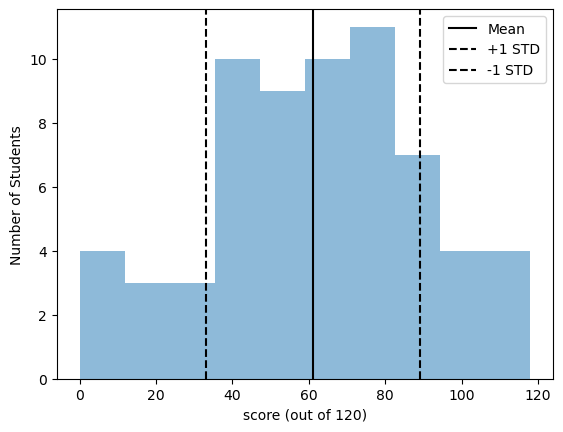

In [62]:
import matplotlib.pyplot as plt

plt.hist(scores,alpha=0.5)
plt.axvline(61,color='k',label="Mean")
plt.axvline(89,ls='--',color='k',label="+1 STD")
plt.axvline(33,ls='--',color='k',label="-1 STD")
plt.xlabel('score (out of 120)')
plt.ylabel('Number of Students')
plt.legend()
plt.show()

Nice! It looks like our formula for standard deviation successfully describes the original distribution of scores pretty well. Now, how to get them to do better on midterm 2....

### 2) Altitude of a satellite

A satellite is to be launched into a circular orbit around the Earth so that it orbits the planet once every T seconds.

The altitude h above the Earth’s surface that the satellite must have is:

$$h = \left( \frac{G M T^2}{4\pi^2} \right)^{1/3} - R$$

where $G = 6.67 \times 10^{-11}$ m$^3$ kg$^{-1}$ s$^{-2}$
is Newton's gravitational constant, $M = 5.97 \times 10^{24}$ kg is the mass of the Earth, and $R = 6371$ km is its radius.

#### Write a program that uses a function that asks the user to enter the desired value of T and then calculates and prints out the correct altitude in meters.


In [103]:
import math
T = int(input("Input desired orbit time in seconds:"))
G= 6.67*(10**-11)
M= 5.97 * (10**24) 
R= 6371 
def h (T): 
    h = ((G*M*(T**2))/ 4* (math.pi)**2)**(1/3) - R 
    return h 

print("The required altitude is:" ,h(T))

Input desired orbit time in seconds: 86148


The required altitude is: 193908049.16329327


Use your program to calculate the altitudes of satellites that orbit the Earth once
a day (so-called “geosynchronous” orbit), once every 90 minutes, and once every
45 minutes. What do you conclude from the last of these calculations?


In [ ]:
#The altitudes are as follows: 
# Geosynchronous - 194286023.818  , 90 min - 30592763.758, 45 min - 19269875.995

Technically a geosynchronous satellite is one that orbits the Earth once persidereal
day, which is 23.93 hours, not 24 hours. Why is this? And how much difference
will it make to the altitude of the satellite?

In [ ]:
# The required altitude is 193908049.163, which is a 377974.655 difference. This difference in time is because a per
#sidereal day measures the Earth's rotation relative to the distant "fixed" stars, while the civil day is simply used for timekeeping (24 hours). 